In [1]:
import imp
import plotto
#imp.reload(plotto)
import pandas as pd
pd.set_option('display.max_colwidth', -1)

%matplotlib inline
#notebook
import matplotlib.units 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#imp.reload(matplotlib)
import plotto

from plots_test import *
import plots_test
ureg = plotto.ureg()

simul = plotto.query("/tmp/antonio/magneticum.sql.faster")
ureg.define('hubble = %f'%(simul("select h from simulation").h[0]))
clash  = plotto.ObservativeTable('data/CLASH.txt',csv_delimiter=',')



importing Jupyter notebook from plots_test.ipynb


plots_test.ipynb:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "             \"Groener et al 2016 WL\": O(xrange=[14,15], c8e14=7., B=-0.42),\n",
plots_test.ipynb:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ]
plots_test.ipynb:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "code",


In [177]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
simul ("""
            select snap.id as snap_id,*
            from simulation
            inner join snap on snap.simulation_id=simulation.id
            inner join (
                select fof.snap_id as id,count(*) as count
                from fof
                where resolvness > 0
                group by fof.snap_id
            ) as A on A.id = snap.id
       """)


,snap_id,id,name,box_size,h,id,name,redshift,a,simulation_id,tag,id,count
0,1,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,1,037,2.220446e-16,1.000000,1,z0,1,40076
1,2,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,2,025,4.661420e-01,0.682062,1,z05,2,9542
2,3,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,3,014,1.166085e+00,0.461662,1,z1,3,348
3,4,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,4,012,1.467036e+00,0.405345,1,z15,4,53
4,5,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,5,037,2.220446e-16,1.000000,2,z0,5,44537
5,6,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,6,025,4.701941e-01,0.680182,2,z05,6,11311
6,7,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,7,014,1.178895e+00,0.458948,2,z1,7,486
7,8,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,8,012,1.477581e+00,0.403619,2,z15,8,93
8,9,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,9,010,1.980082e+00,0.335561,2,z2,9,9
9,10,3,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,10,031,2.520891e-01,0.798665,3,z0,10,156110


In [2]:
all_df_z0 = simul ("""
    select  fof.mcri, fof.tgas0, pp.* , fof.r5cc, fof.rvir, fof.m5cc, fof.glen, fof.rcri, fof.id_cluster as fof_id_cluster, pp.id_cluster as pp_id_cluster
    from pp
    inner join fof on fof.snap_id=pp.snap_id and fof.id_cluster = pp.id_cluster
    inner join snap on  pp.snap_id = snap.id
    inner join simulation on simulation.id = snap.simulation_id
    and instr( simulation.name,'_dm')<=0
     
    and snap.tag='z0'
    --and snap.id= 5
    """)



In [7]:
all_fof_z0 = simul ("""
    select  fof.*
    from fof
    inner join snap on  fof.snap_id = snap.id
    and snap.id= 5
    """)

all_pp_z0 = simul ("""
    select  pp.*
    from pp
    inner join snap on   pp.snap_id = snap.id
    and snap.id= 5
    """)

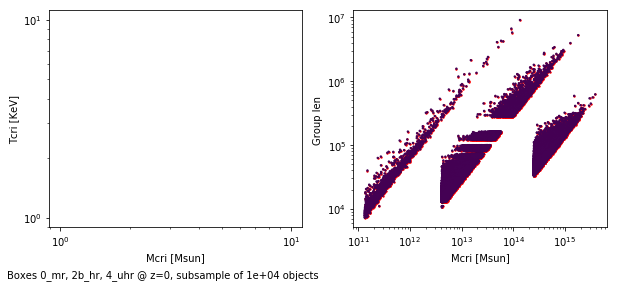

In [8]:
n_subsample = 10000
rdf = all_df_z0#.sample(n=n_subsample)
f,a12 = plt.subplots(1,2, figsize=(10,4))
a1=a12[0]
a2=a12[1]
f.subplots_adjust(hspace=0)
a1.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.tgas0,c=rdf.c200c, s=2) #c=rdf.redshift, s=2)
a1.set_xscale('log')
a1.set_yscale('log')
a1.set_xlabel("Mcri [Msun]")
a1.set_ylabel("Tcri [KeV]")

a2.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.glen,color="red", s=2)
a2.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.glen,c=rdf.c200c>0, s=2) #c=rdf.redshift, s=2)
a2.set_xscale('log')
a2.set_yscale('log')
a2.set_xlabel("Mcri [Msun]")
a2.set_ylabel("Group len ")
f.text(.5, -0.05, "Boxes 0_mr, 2b_hr, 4_uhr @ z=0, subsample of %.0e objects"%(n_subsample), ha='right')

None

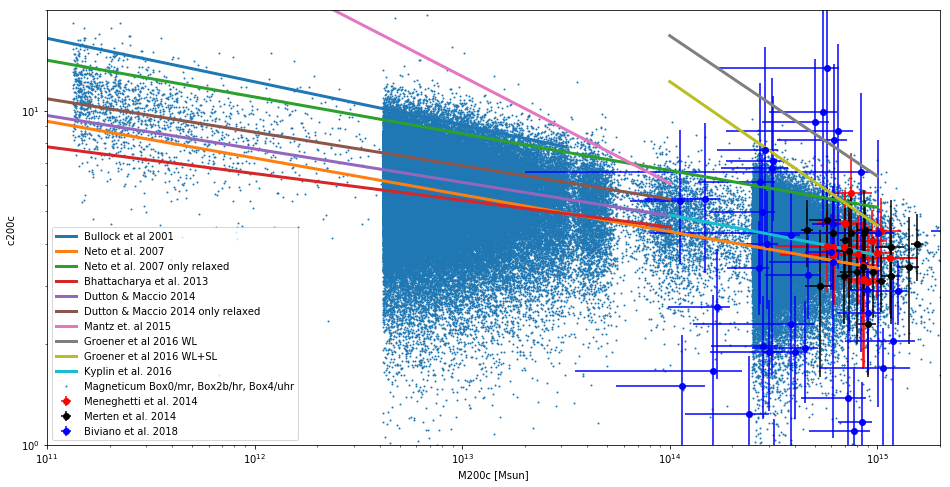

In [6]:
fig,a = plt.subplots(1,1, figsize=(16,8))
df=all_df_z0#.sample(n=100000)
#colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, s=1, label='Magneticum Box0/mr, Box2b/hr, Box4/uhr') #c=rdf.redshift, s=2)

for interp_observation_name in interp_observations:
    obs = interp_observations[interp_observation_name]
    x = np.logspace(obs.xrange[0],obs.xrange[1],3)
        
    y = sc(obs.c8e14,obs.B)(x)
    a.plot(x,y, linewidth=3, label=interp_observation_name)

for idx, row in meneghetti.iterrows():
    a.errorbar(row.M200c.value,
               row.c200c.value,
               xerr=[[row.M200c.minus], [row.M200c.plus]], 
               yerr=[[row.c200c.plus], [row.c200c.minus]], 
               color='red',
               fmt='o', **{"label":'Meneghetti et al. 2014' } if idx==0 else {} )
    


for idx, row in clash.iterrows():
    a.errorbar(row.m200c.value,
               row.c200c.value,
               xerr=[[row.m200c.minus], [row.m200c.plus]], 
               yerr=[[row.c200c.plus], [row.c200c.minus]], 
               color='black',
               fmt='o', **{"label":'Merten et al. 2014' } if idx==0 else {} )
    

for idx, row in andrea_old.iterrows():
    a.errorbar(row.m200c.value,
               row.c200c.value,
               xerr=[[row.m200c.minus], [row.m200c.plus]], 
               yerr=[[row.c200c.plus], [row.c200c.minus]],
               color='blue',
               fmt='o', **{"label":'Biviano et al. 2018' } if idx==0 else {} )

set_Mc_lims(a)


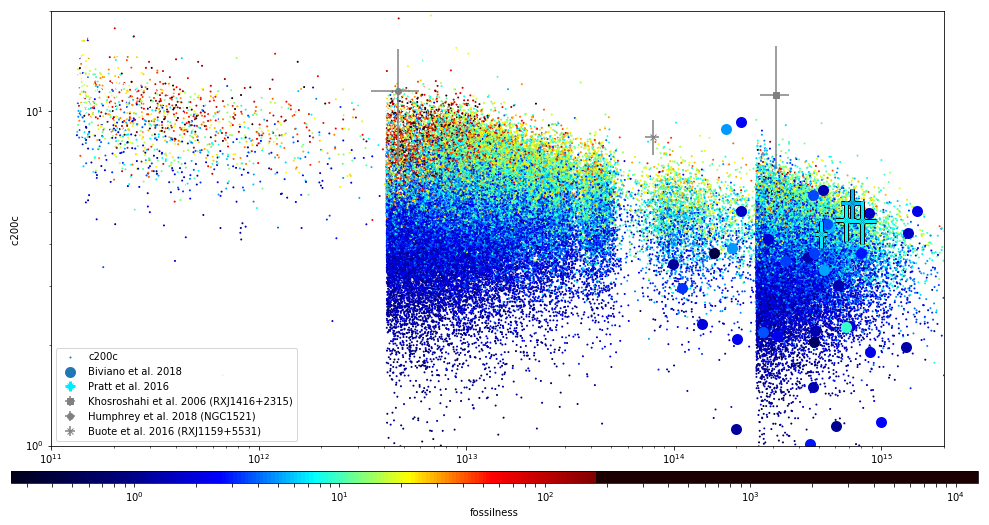

In [22]:


fig,a = plt.subplots(1,1, figsize=(16,8))

df=all_df_z0#.sample(n=100)
colormap, norm = plotto.gen_supermap(all_df_z0.fossilness,poutside=0.01)
cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])

scatter = a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, c= df.fossilness, s=1,cmap=colormap, norm=norm) #c=rdf.redshift, s=2)
colorbar = fig.colorbar(scatter, label="fossilness",cax=cbar_ax,  orientation='horizontal')

for idx, row in pratt.iterrows():
    color = colorbar.to_rgba(10.**(row.Deltam.value/2.5) )
    a.errorbar(row.M200.value, row.c200.value, 
               xerr=[[row.M200.minus], [row.M200.plus]],
               yerr=[[row.c200.minus], [row.c200.plus]],
                linewidth=5, color='black', ecolor='black',
               fmt='x')
    
for idx, row in pratt.iterrows():
    color = colorbar.to_rgba(10.**(row.Deltam.value/2.5) )
    a.errorbar(row.M200.value, row.c200.value, 
               xerr=[[row.M200.minus], [row.M200.plus]],
               yerr=[[row.c200.minus], [row.c200.plus]],
               c=color, ecolor=color, linewidth=3, 
               fmt='x',**{"label":'Pratt et al. 2016' } if idx==0 else {} )
    

andrea_fossil_mask = andrea.fossilness.value>9

idrow = -1
for idx, row in andrea.iterrows():
    idrow +=1
    a.scatter(row.M200.value,
           row.c200.value,
           #xerr=[[row.m200c.minus], [row.m200c.plus]], 
           #yerr=[[row.c200c.plus], [row.c200c.minus]], 
           c=row.fossilness.value,
           linewidth=5, cmap=colormap, norm=norm,
           #fmt='o',
           **{"label":'Biviano et al. 2018' }if idrow==0 else {}  )


"""
for idx, row in andrea[andrea_fossil_mask].iterrows():
    a.plot(row.m200c.value,
               row.c200c.value,
               #xerr=[[row.m200c.minus], [row.m200c.plus]], 
               #yerr=[[row.c200c.plus], [row.c200c.minus]], 
               c=andrea.fossilness.value,
               #fmt='o',
               **{"label":'Biviano et al. 2018, DeltaM>1.7' } if idx==0 else {} )
idrow = -1
   """                        

fmts ="sox"
colors=["maroon","fuchsia","pink","maroon"]
"# ^<>v12348sp"
              
for idx, row in fossil.iterrows():
    if idx==3: break
    a.errorbar(row.M200.value,
               row.c200.value,
               xerr=[[row.M200.minus], [row.M200.plus]], 
               yerr=[[row.c200.plus], [row.c200.minus]], 
               color='gray',# linewidth=5, # colors[idx],
               fmt=fmts[idx],  label='%s (%s)'%(row.author.value, row.cluster.value) )


set_Mc_lims(a,loc=3)

In [163]:

xdf0 = simul ("""
select fof.id_cluster,1e10*fof.mcri,snap.id as snap_id, snap.tag,simulation.name from fof 
inner join galaxy on galaxy.id_cluster = fof.id_cluster and galaxy.snap_id = fof.snap_id
inner join snap on snap.id = fof.snap_id
inner join simulation on simulation.id = snap.simulation_id
 where  
 fof.mcri>.8e15/1e10 and
  galaxy.msub>fof.mcri*0.1

""")

xdf=xdf0


In [183]:


xdf['ngalaxies'] = xdf.groupby(['id_cluster','snap_id']).count().reset_index()['name']
xdf[xdf['ngalaxies'] >= 3] 


,id_cluster,1e10*fof.mcri,snap_id,tag,name,ngalaxies
6,4,1.940302e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
8,5,2.983808e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
50,40,1.419702e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
183,144,1.295337e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
187,147,1.622256e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
328,285,1.227412e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,4.0
446,400,1.175905e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
596,538,8.175329e+14,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
606,546,1.058928e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
684,634,1.285255e+15,1,z0,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/mr_dm/,3.0
